In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train= pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
#drop columns has too many NA
train = train.drop(train[["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"]],axis=1)
test = test.drop(test[["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"]],axis=1)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


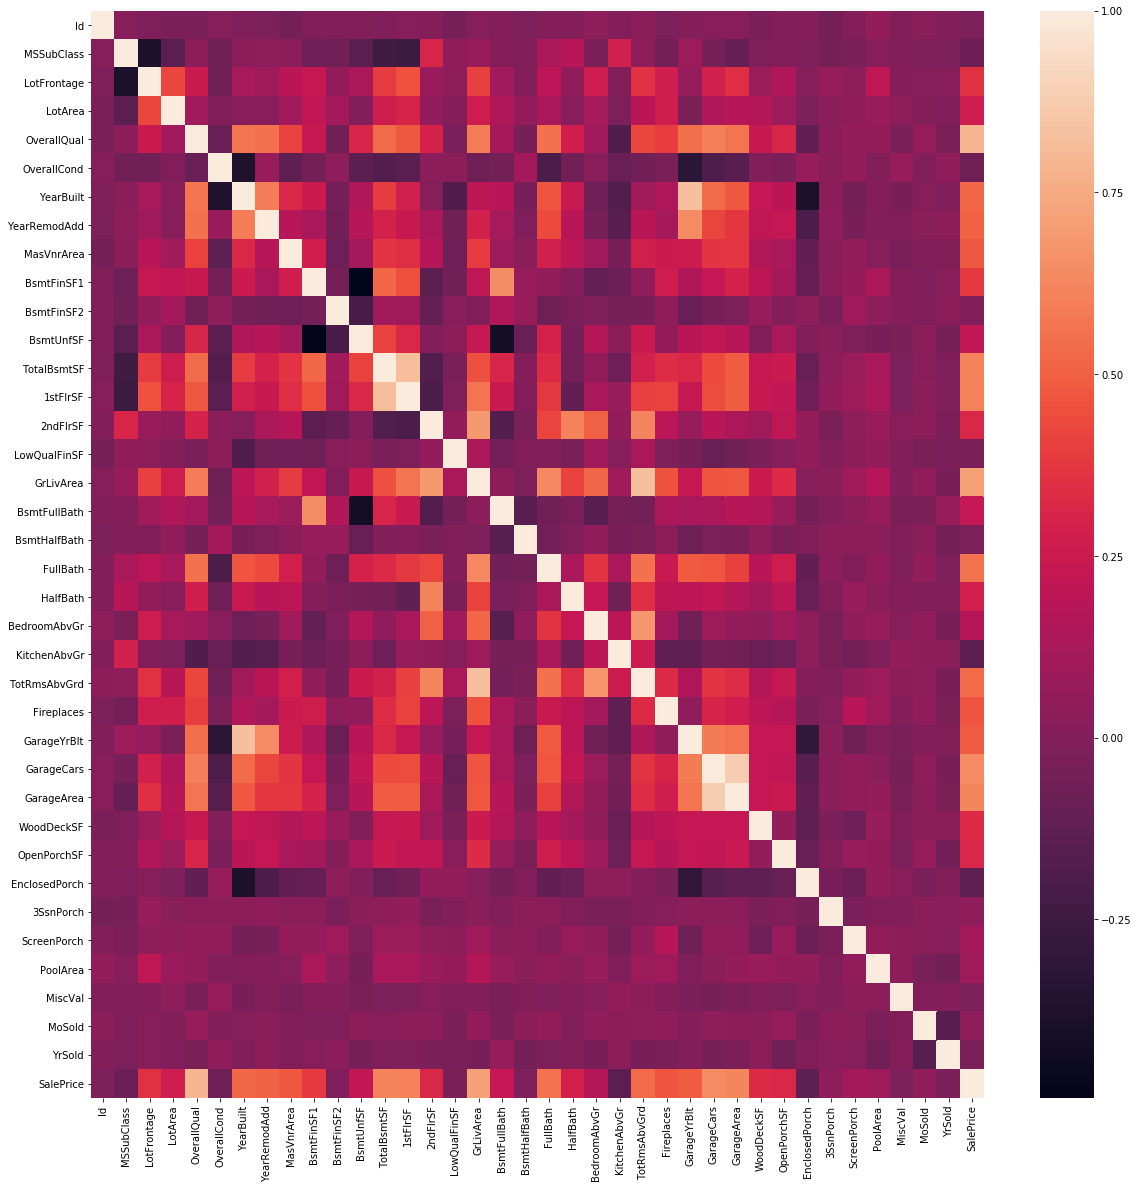

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,20))
ax = plt.axes()
corr = train.corr()
sns.heatmap(corr)

In [6]:
#choose from features that has higher correlation from the heatmap
train1 = train[["SalePrice","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
test1 = test[["OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]


In [7]:
#add some might useful variables
train1["GarageFinish"] = train["GarageFinish"]
test1["GarageFinish"] = test["GarageFinish"]
train1["GarageType"] = train["GarageType"]
test1["GarageType"] = test["GarageType"]
train1["Foundation"] = train["Foundation"]
test1["Foundation"] = test["Foundation"]
train1["ExterQual"] = train["ExterQual"]
test1["ExterQual"] = test["ExterQual"]
train1["MasVnrType"] = train["MasVnrType"]
test1["MasVnrType"] = train["MasVnrType"]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



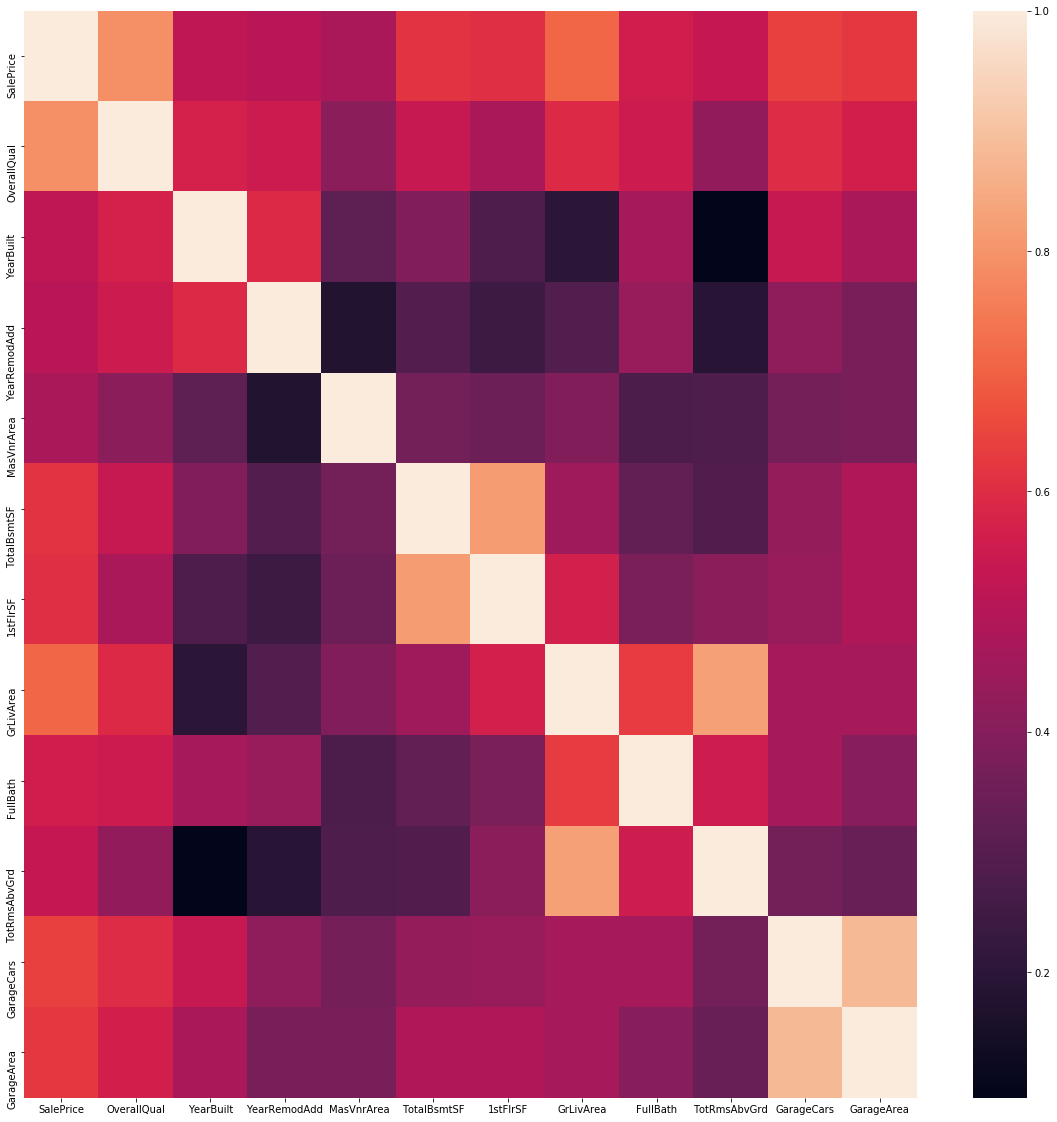

In [8]:
plt.subplots(figsize=(20,20))
ax = plt.axes()
corr = train1.corr()
sns.heatmap(corr)

In [9]:
#from the heatmap, only ExterQual is a good feature
traindata = train1.drop(train[["MasVnrType","Foundation","GarageType","GarageFinish"]],axis=1)
testdata = test1.drop(train[["MasVnrType","Foundation","GarageType","GarageFinish"]],axis=1)


In [10]:
#fil Na
testdata["MasVnrArea"].fillna(method='ffill',inplace=True)
testdata.fillna(testdata.mean(),inplace=True)
traindata["MasVnrArea"].fillna(method='ffill',inplace=True)
traindata.fillna(testdata.mean(),inplace=True)

In [11]:
traindata["ExterQual"] = traindata["ExterQual"].map({"TA":1,"Gd":2,"Ex":3,"Fa":4})
testdata["ExterQual"] = testdata["ExterQual"].map({"TA":1,"Gd":2,"Ex":3,"Fa":4})
traindata.head()

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual
0,208500,7,2003,2003,196.0,856,856,1710,2,8,2,548,2
1,181500,6,1976,1976,0.0,1262,1262,1262,2,6,2,460,1
2,223500,7,2001,2002,162.0,920,920,1786,2,6,2,608,2
3,140000,7,1915,1970,0.0,756,961,1717,1,7,3,642,1
4,250000,8,2000,2000,350.0,1145,1145,2198,2,9,3,836,2


In [12]:
X=traindata[["OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea","ExterQual"]]
y=traindata[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_reg.fit(X_train, y_train)
y_pred_rf = rnd_reg.predict(X_test)
print("RandomForestRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_rf)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor RMSE: 31965.62772790522


In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=200, learning_rate=0.5)
ada_reg.fit(X_train, y_train)
y_pred_ada=ada_reg.predict(X_test)
print("AdaBoostRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_ada)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor RMSE: 30631.409028502458


In [15]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
print("XGBRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_xgb)))

[20:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor RMSE: 32020.77377424264


In [16]:
X=train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF']]
y=train[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [17]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

[20:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
print("XGBRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBRegressor RMSE: 25781.979011576364


In [19]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [20]:
test_X=test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF']]
test_y=test_X.values.reshape(-1,17)
predicted_price=xgb_reg.predict(test_X)

In [21]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_price})
my_submission.to_csv('submission_lab5.csv', index=False)